A motivação tanto para a escolha da  base, quanto para a analise , é a importância que o IDH tem para qualquer setor da sociedade tanto como indicador de desenvolvimento como de bem estar da população

De maneira poética a nossa motivação seria:
“Ver possíveis  melhorias que o governo do Brasil poderia fazer para a população”

##Sobre os dados
1.   Relevância: A escolha dessa base se deve a sua relevancia para a sociedade e seus problemas. Usando os dados presentes podemos ter diversos “insights” sobre o desenvolvimento do Brasil.
2.   Tamanho: Por ter um tamanho grande a base tende a ter poucos vieses,ou vicios, trazendo maior confiança nos resultados.
3.   Manipulação: A base que escolhemos era de facil modelagem e limpeza apesar do seu tamanho

## Conjunto de dados
A base que escolhemos possui 327 colunas diferentes e mais de 16000 registros, por seu tamanho escolhemos usar apenas as seguintes colunas:


* ano: Ano referente a captura dos dados;
* sobre60: Porcentagem de chance de sobreviver até os 60 anos de idade
* uf: UF do local
* município: Nome do município
* mort1: Mortalidade aos 1 anos de idade
* mort5:Mortalidade aos 5 anos de idade
* t_agua: Possui acesso a agua potavel em casa
* t_banagua: Possui agua para o uso em banheiros em casa
* t_lixo: Possui coleta de lixo adequada
* t_luz: Possui acesso a energia eletrica
* agua_esgoto: Possui tratamento de esgoto
* i_escolaridade: indice de escolaridade
* idhm: IDH Municipal
* idhm_e: IDH Municipal  Educacão
* idhm_l: IDH Municipal  Longevidade
* idhm_r: IDH Municipal  Renda

##Pré-Processamento

Graças a base já ser muito bem estrutura e bem completa, poucos valores nulos, tivemos apenas que escolher as colunas em que iriamos trabalhar



In [ ]:
!pip install scikit-learn
!pip install plotly

In [ ]:
# Importando bibliotecas necessárias
import requests, os, glob, re
import seaborn as sns
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection, datasets
from matplotlib import style
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import SCORERS, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [ ]:
# Montando o Google Drive no ambiente Colab
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Mudando o diretório para a pasta desejada no Google Drive
%cd '/content/drive/MyDrive/Mineiração_AP1/'

/content/drive/MyDrive/Mineiração_AP1


In [ ]:
#Gabriel
%cd '/content/drive/MyDrive/3_Semestre/MineracaoDeDados/Mineiração_AP1'

[Errno 2] No such file or directory: '/content/drive/MyDrive/3_Semestre/MineracaoDeDados/Mineiração_AP1'
/content/drive/MyDrive/Mineiração_AP1


In [ ]:
# Lendo um arquivo CSV chamado 'atlas.csv' e armazenando os dados em um DataFrame chamado 'df'
df = pd.read_csv('atlas.csv', sep=",", encoding_errors="replace", low_memory=False, memory_map=True)
df.head()

,ano,codmun6,uf,codmun7,município,espvida,fectot,mort1,mort5,razdep,...,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r
0,1991,110001,11,1100015,ALTA FLORESTA D'OESTE,62.01,4.08,45.58,58.05,73.50,...,NaN,NaN,23417,22835,0.117,0.109,0.329,0.112,0.617,0.516
1,1991,110002,11,1100023,ARIQUEMES,66.02,3.72,32.39,41.41,69.97,...,NaN,NaN,56061,55018,0.200,0.199,0.432,0.199,0.684,0.593
2,1991,110003,11,1100031,CABIXI,63.16,3.89,41.52,52.94,77.23,...,NaN,NaN,7601,5846,0.111,0.106,0.309,0.108,0.636,0.430
3,1991,110004,11,1100049,CACOAL,65.03,3.81,35.37,45.19,71.11,...,NaN,NaN,69173,66534,0.176,0.169,0.407,0.171,0.667,0.593
4,1991,110005,11,1100056,CEREJEIRAS,62.73,3.55,43.00,54.82,71.09,...,NaN,NaN,19451,19030,0.152,0.175,0.386,0.167,0.629,0.547


In [ ]:
df.columns

Index(['ano', 'codmun6', 'uf', 'codmun7', 'município', 'espvida', 'fectot',
       'mort1', 'mort5', 'razdep',
       ...
       'pia1517', 'pia18m', 'pop', 'popt', 'i_escolaridade', 'i_freq_prop',
       'idhm', 'idhm_e', 'idhm_l', 'idhm_r'],
      dtype='object', length=237)

In [ ]:
# Selecionando apenas as colunas desejadas do DataFrame
df_suicidios = df[['ano','codmun6','sobre60','uf','codmun7','município','espvida','fectot','mort1','mort5','razdep','gini','pind','t_agua','t_banagua','t_dens','t_lixo','t_luz','t_env','agua_esgoto','i_escolaridade','i_freq_prop','idhm','idhm_e','idhm_l','idhm_r']]
df_suicidios

,ano,codmun6,sobre60,uf,codmun7,município,espvida,fectot,mort1,mort5,...,t_lixo,t_luz,t_env,agua_esgoto,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r
0,1991,110001,66.87,11,1100015,ALTA FLORESTA D'OESTE,62.01,4.08,45.58,58.05,...,6.82,36.80,1.82,7.45,0.117,0.109,0.329,0.112,0.617,0.516
1,1991,110002,74.23,11,1100023,ARIQUEMES,66.02,3.72,32.39,41.41,...,78.30,73.28,1.82,2.55,0.200,0.199,0.432,0.199,0.684,0.593
2,1991,110003,69.00,11,1100031,CABIXI,63.16,3.89,41.52,52.94,...,50.92,25.04,2.59,0.63,0.111,0.106,0.309,0.108,0.636,0.430
3,1991,110004,72.44,11,1100049,CACOAL,65.03,3.81,35.37,45.19,...,65.59,57.34,2.47,1.19,0.176,0.169,0.407,0.171,0.667,0.593
4,1991,110005,68.20,11,1100056,CEREJEIRAS,62.73,3.55,43.00,54.82,...,32.87,56.36,2.46,0.55,0.152,0.175,0.386,0.167,0.629,0.547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,2010,522200,82.02,52,5222005,VIANÓPOLIS,74.10,2.10,14.40,17.04,...,99.32,99.83,7.17,0.38,0.432,0.747,0.712,0.622,0.818,0.710
16691,2010,522205,80.75,52,5222054,VICENTINÓPOLIS,73.25,2.29,15.70,18.51,...,98.78,99.70,5.49,9.04,0.389,0.676,0.684,0.562,0.804,0.707
16692,2010,522220,81.98,52,5222203,VILA BOA,74.07,2.64,14.50,17.09,...,99.21,99.78,4.05,1.98,0.431,0.594,0.647,0.534,0.818,0.619
16693,2010,522230,80.50,52,5222302,VILA PROPÍCIO,73.09,2.67,15.90,18.80,...,100.00,97.59,7.06,6.63,0.330,0.624,0.634,0.505,0.802,0.629


In [ ]:
# Removendo linhas com valores ausentes do DataFrame
suicidios_clear = df_suicidios.dropna()
suicidios_clear

,ano,codmun6,sobre60,uf,codmun7,município,espvida,fectot,mort1,mort5,...,t_lixo,t_luz,t_env,agua_esgoto,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r
0,1991,110001,66.87,11,1100015,ALTA FLORESTA D'OESTE,62.01,4.08,45.58,58.05,...,6.82,36.80,1.82,7.45,0.117,0.109,0.329,0.112,0.617,0.516
1,1991,110002,74.23,11,1100023,ARIQUEMES,66.02,3.72,32.39,41.41,...,78.30,73.28,1.82,2.55,0.200,0.199,0.432,0.199,0.684,0.593
2,1991,110003,69.00,11,1100031,CABIXI,63.16,3.89,41.52,52.94,...,50.92,25.04,2.59,0.63,0.111,0.106,0.309,0.108,0.636,0.430
3,1991,110004,72.44,11,1100049,CACOAL,65.03,3.81,35.37,45.19,...,65.59,57.34,2.47,1.19,0.176,0.169,0.407,0.171,0.667,0.593
4,1991,110005,68.20,11,1100056,CEREJEIRAS,62.73,3.55,43.00,54.82,...,32.87,56.36,2.46,0.55,0.152,0.175,0.386,0.167,0.629,0.547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,2010,522200,82.02,52,5222005,VIANÓPOLIS,74.10,2.10,14.40,17.04,...,99.32,99.83,7.17,0.38,0.432,0.747,0.712,0.622,0.818,0.710
16691,2010,522205,80.75,52,5222054,VICENTINÓPOLIS,73.25,2.29,15.70,18.51,...,98.78,99.70,5.49,9.04,0.389,0.676,0.684,0.562,0.804,0.707
16692,2010,522220,81.98,52,5222203,VILA BOA,74.07,2.64,14.50,17.09,...,99.21,99.78,4.05,1.98,0.431,0.594,0.647,0.534,0.818,0.619
16693,2010,522230,80.50,52,5222302,VILA PROPÍCIO,73.09,2.67,15.90,18.80,...,100.00,97.59,7.06,6.63,0.330,0.624,0.634,0.505,0.802,0.629


# Gráficos

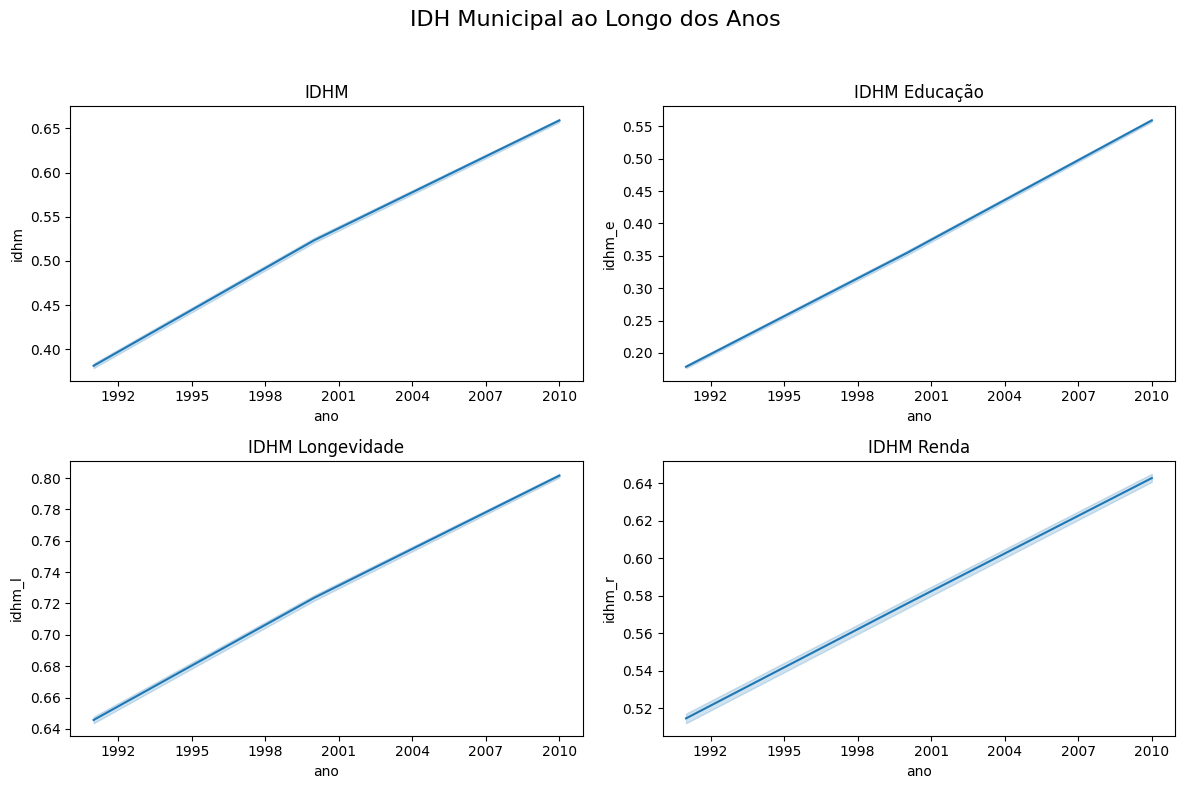

In [ ]:
ano = suicidios_clear['ano']
idhm = suicidios_clear['idhm']
idhm_e = suicidios_clear['idhm_e']
idhm_l = suicidios_clear['idhm_l']
idhm_r = suicidios_clear['idhm_r']

#subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('IDH Municipal ao Longo dos Anos', fontsize=16)

# 'idhm'
sns.lineplot(x=ano, y=idhm, ax=axes[0, 0])
axes[0, 0].set_title('IDHM')

# 'idhm_e'
sns.lineplot(x=ano, y=idhm_e, ax=axes[0, 1])
axes[0, 1].set_title('IDHM Educação')

# 'idhm_l'
sns.lineplot(x=ano, y=idhm_l, ax=axes[1, 0])
axes[1, 0].set_title('IDHM Longevidade')

# 'idhm_r'
sns.lineplot(x=ano, y=idhm_r, ax=axes[1, 1])
axes[1, 1].set_title('IDHM Renda')

# layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# eixo x com inteiros
for ax in axes.flat:
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

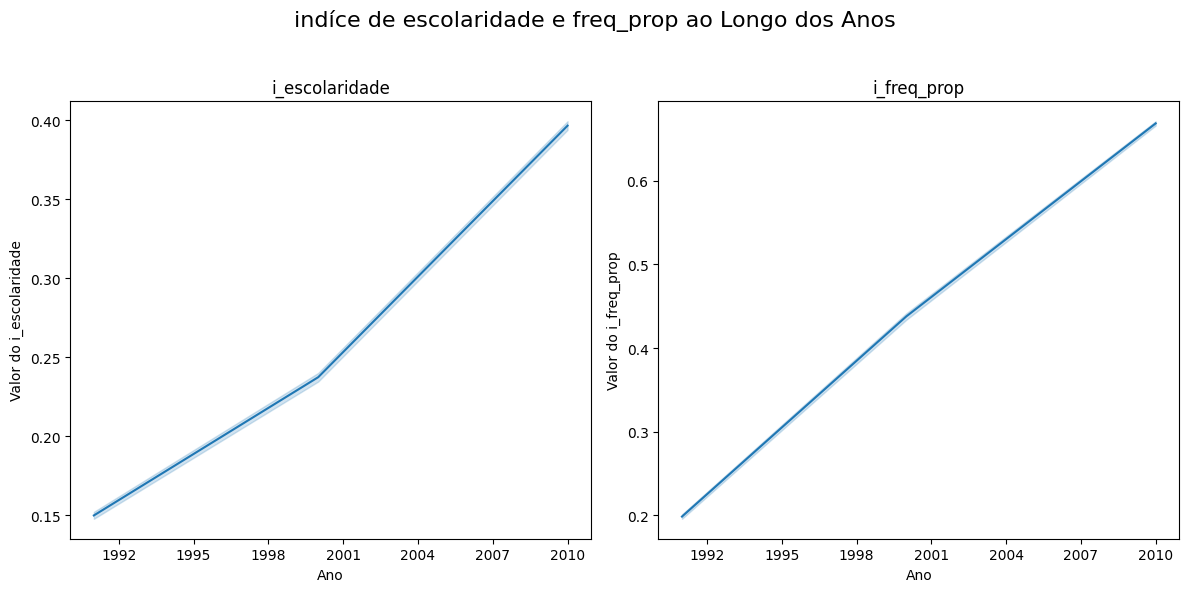

In [ ]:
i_escolaridade = suicidios_clear['i_escolaridade']
i_freq_prop = suicidios_clear['i_freq_prop']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('indíce de escolaridade e freq_prop ao Longo dos Anos', fontsize=16)

sns.lineplot(x=ano, y=i_escolaridade, ax=axes[0])
axes[0].set_title('i_escolaridade')
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Valor do i_escolaridade')

sns.lineplot(x=ano, y=i_freq_prop, ax=axes[1])
axes[1].set_title('i_freq_prop')
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Valor do i_freq_prop')

plt.tight_layout()

plt.tight_layout(rect=[0, 0, 1, 0.95])

# eixo x com inteiros
for ax in axes.flat:
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

<ipython-input-12-49be9af57c22>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = suicidios_clear.corr()


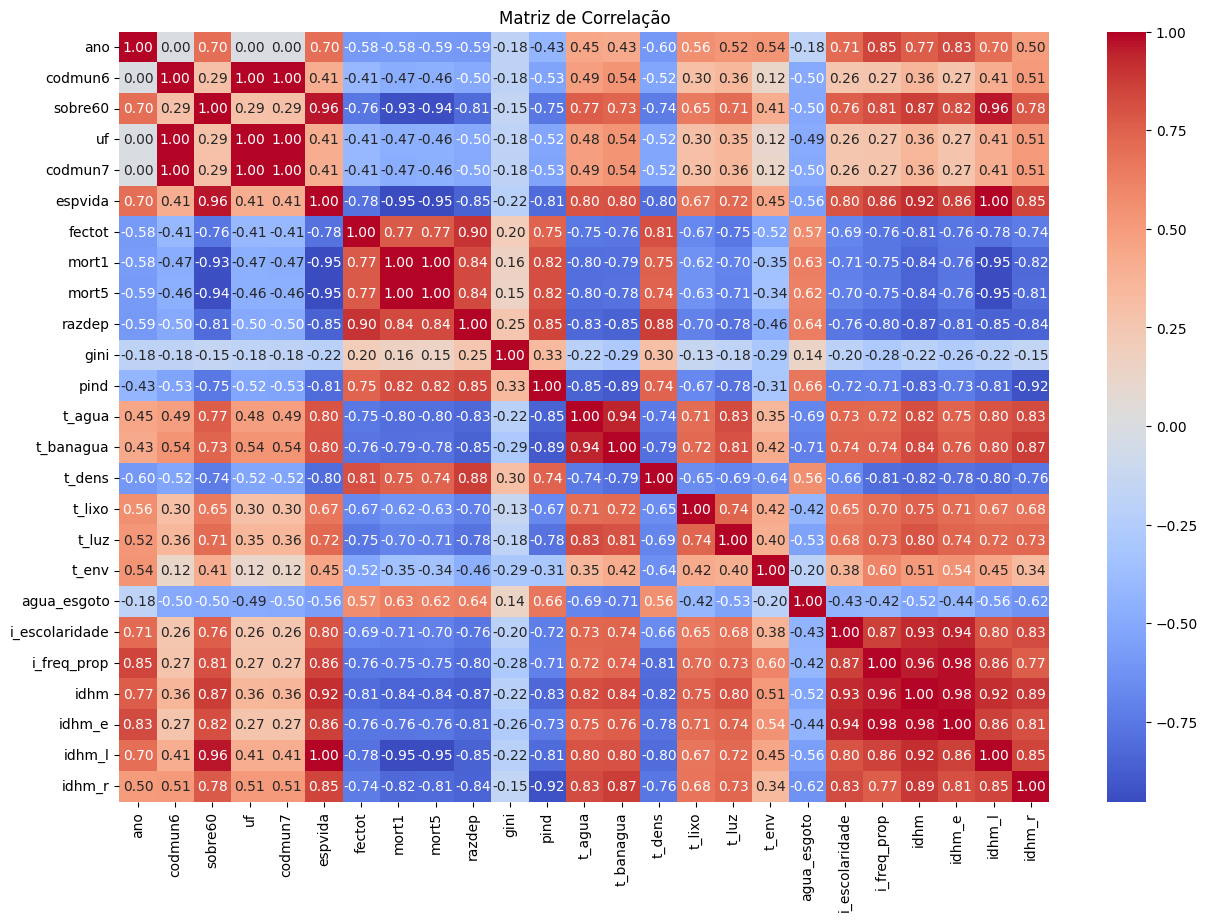

In [ ]:
# matriz de correlação
corr_matrix = suicidios_clear.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Matriz de Correlação')

plt.show()

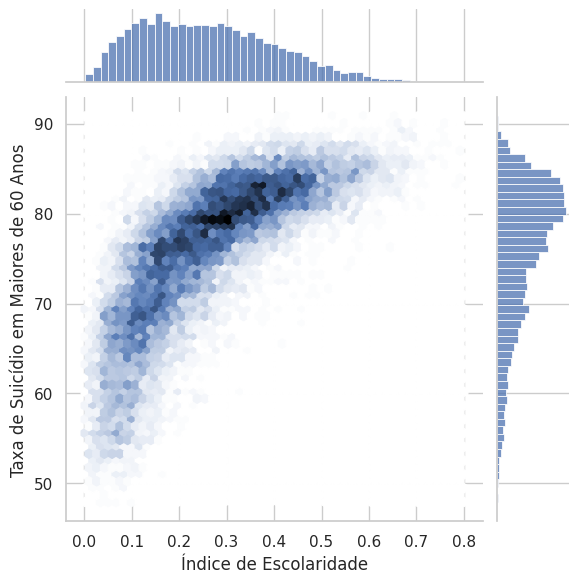

In [ ]:
# gráfico hexagonal
sns.set(style="whitegrid")
g = sns.jointplot(data=suicidios_clear, x='i_escolaridade', y='sobre60', kind='hex')

g.ax_joint.set_xlabel('Índice de Escolaridade')
g.ax_joint.set_ylabel('Taxa de Suicídio em Maiores de 60 Anos')

plt.show()

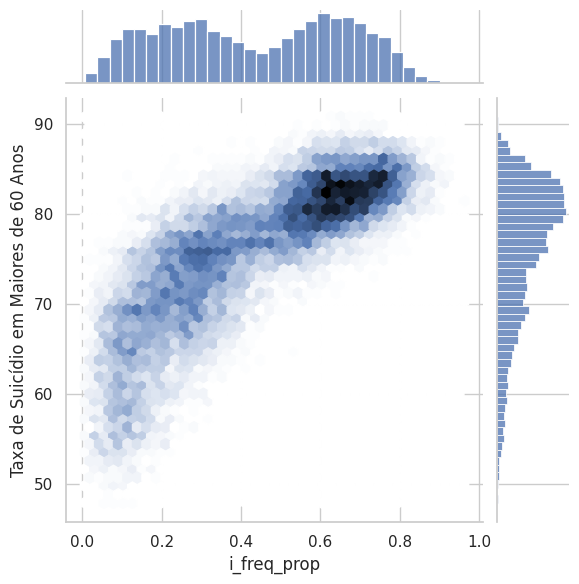

In [ ]:
sns.set(style="whitegrid")
g = sns.jointplot(data=suicidios_clear, x='i_freq_prop', y='sobre60', kind='hex')

g.ax_joint.set_xlabel('i_freq_prop')
g.ax_joint.set_ylabel('Taxa de Suicídio em Maiores de 60 Anos')

plt.show()

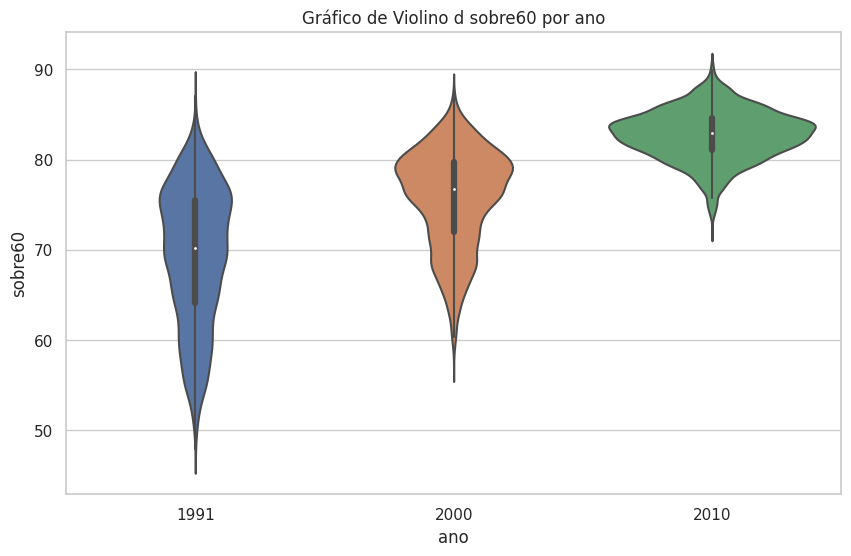

In [ ]:
# gráfico de violino
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.violinplot(x="ano", y="sobre60", data=suicidios_clear)

plt.xlabel('ano')
plt.ylabel('sobre60')
plt.title('Gráfico de Violino d sobre60 por ano')

plt.show()

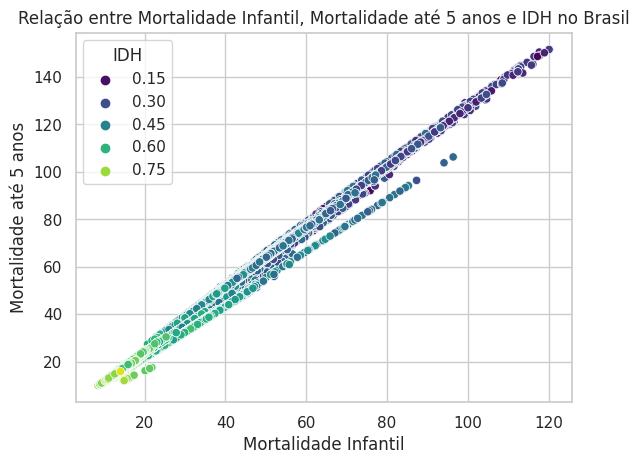

In [ ]:
sns.set(style="whitegrid")

sns.scatterplot(x="mort1", y="mort5", hue="idhm", data=suicidios_clear, palette="viridis")

plt.title("Relação entre Mortalidade Infantil, Mortalidade até 5 anos e IDH no Brasil")
plt.xlabel("Mortalidade Infantil")
plt.ylabel("Mortalidade até 5 anos")

plt.legend(title="IDH")

plt.show()

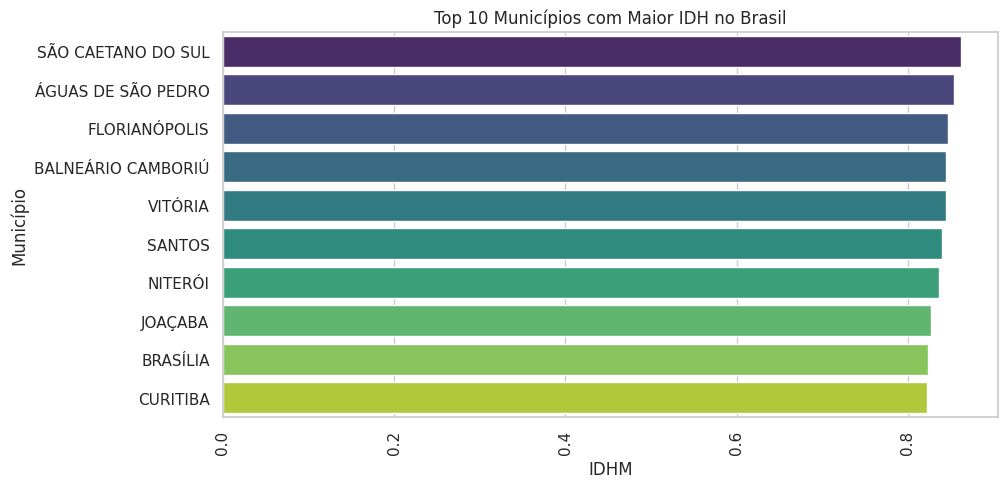

In [ ]:
top_10_municipios = suicidios_clear.sort_values(by='idhm', ascending=False).head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.barplot(x='idhm', y='município', data=top_10_municipios, palette="viridis")

plt.title("Top 10 Municípios com Maior IDH no Brasil")
plt.xlabel("IDHM")
plt.ylabel("Município")

plt.xticks(rotation=90)

plt.show()

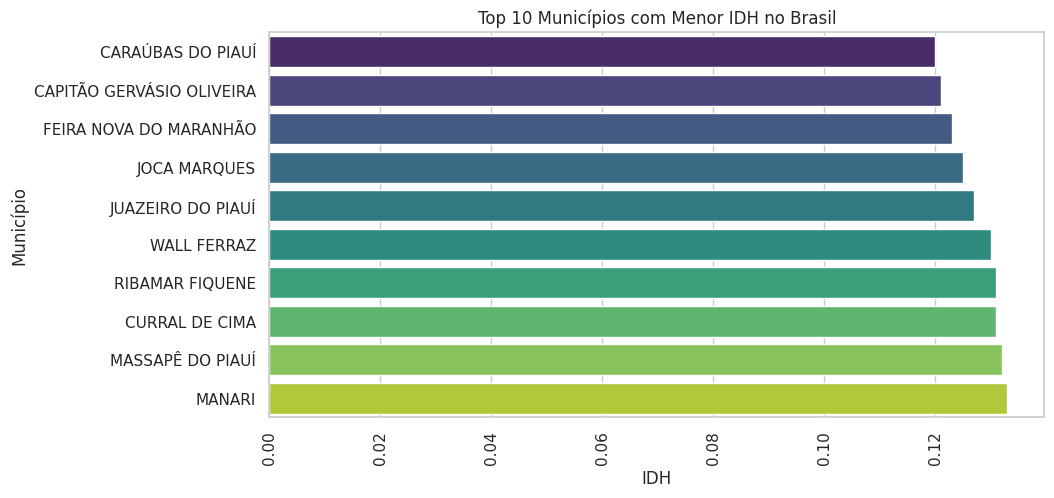

In [ ]:
bottom_10_municipios = suicidios_clear.sort_values(by='idhm').head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.barplot(x='idhm', y='município', data=bottom_10_municipios, palette="viridis")

plt.title("Top 10 Municípios com Menor IDH no Brasil")
plt.xlabel("IDH")
plt.ylabel("Município")

plt.xticks(rotation=90)

plt.show()

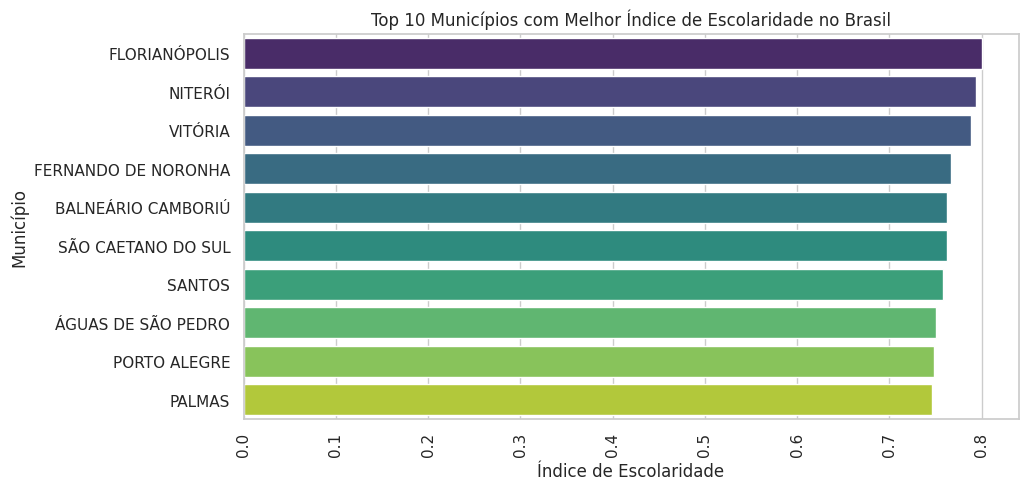

In [ ]:
top_10_escolaridade = suicidios_clear.nlargest(10, 'i_escolaridade')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.barplot(x='i_escolaridade', y='município', data=top_10_escolaridade, palette="viridis")

plt.title("Top 10 Municípios com Melhor Índice de Escolaridade no Brasil")
plt.xlabel("Índice de Escolaridade")
plt.ylabel("Município")

plt.xticks(rotation=90)

plt.show()

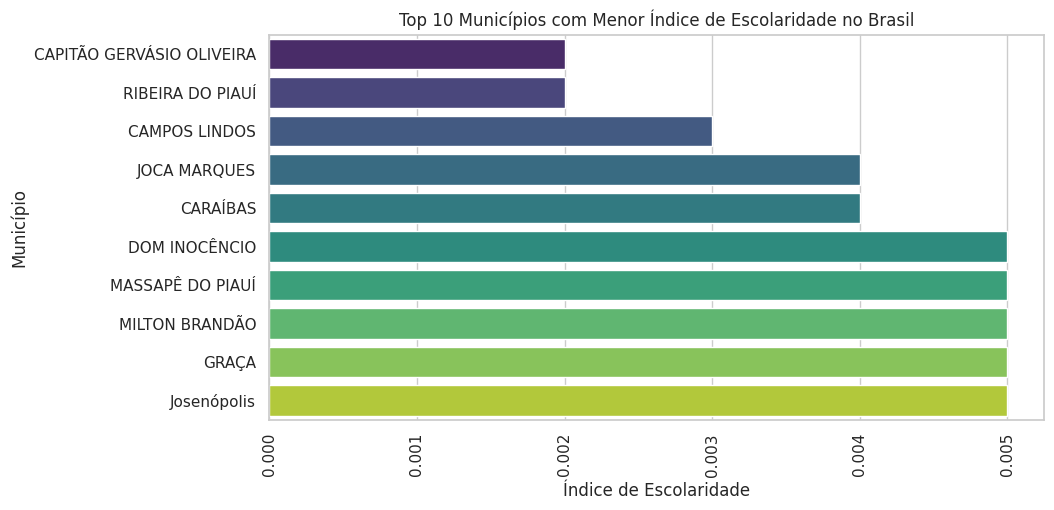

In [ ]:
bottom_10_escolaridade = suicidios_clear.nsmallest(10, 'i_escolaridade')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.barplot(x='i_escolaridade', y='município', data=bottom_10_escolaridade, palette="viridis")

plt.title("Top 10 Municípios com Menor Índice de Escolaridade no Brasil")
plt.xlabel("Índice de Escolaridade")
plt.ylabel("Município")

plt.xticks(rotation=90)

plt.show()

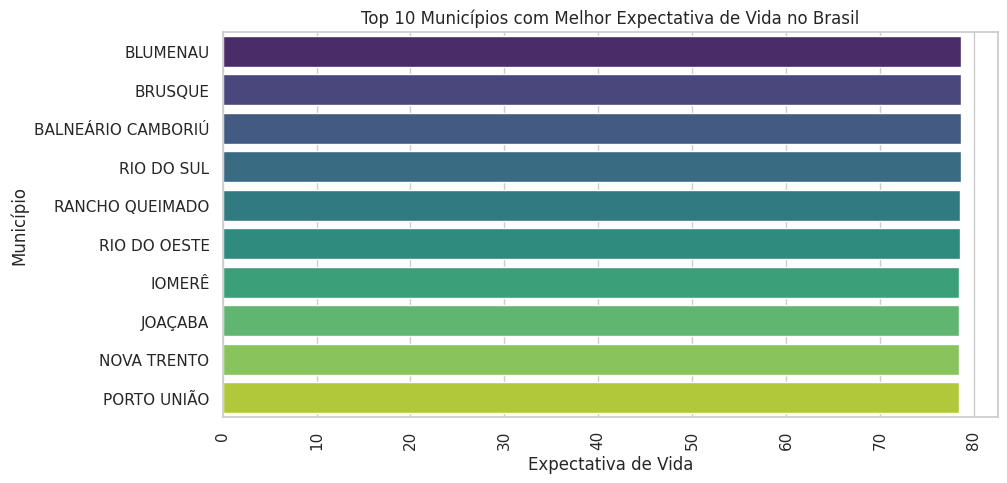

In [ ]:
top_melhores_expectativas = suicidios_clear.nlargest(10, 'espvida')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.barplot(x='espvida', y='município', data=top_melhores_expectativas, palette="viridis")

plt.title("Top 10 Municípios com Melhor Expectativa de Vida no Brasil")
plt.xlabel("Expectativa de Vida")
plt.ylabel("Município")

plt.xticks(rotation=90)

plt.show()

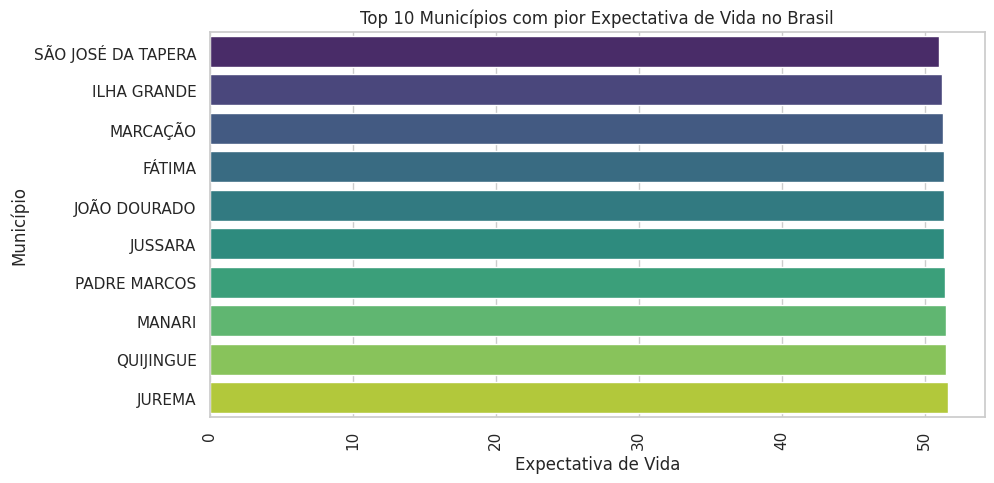

In [ ]:
top_piores_expectativas = suicidios_clear.nsmallest(10, 'espvida')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.barplot(x='espvida', y='município', data=top_piores_expectativas, palette="viridis")

plt.title("Top 10 Municípios com pior Expectativa de Vida no Brasil")
plt.xlabel("Expectativa de Vida")
plt.ylabel("Município")

plt.xticks(rotation=90)

plt.show()

# Previsão

In [ ]:
'''
Colunas utilizadas

sobre60: Porcentagem de chance de sobreviver até os 60 anos de idade;
uf: UF do local;
município: Nome do município;
mort1: Mortalidade aos 1 anos de idade;
mort5:Mortalidade aos 5 anos de idade;
t_agua: Possui acesso a agua potavel em casa;
t_banagua: Possui agua para o uso em banheiros em casa;
t_lixo: Possui coleta de lixo adequada;
t_luz: Possui acesso a energia eletrica;
agua_esgoto: Possui tratamento de esgoto;
i_escolaridade: indice de escolaridade;
idhm: IDH Municipal;
idhm_e: IDH Municipal  Educacão;
idhm_l: IDH Municipal  Longevidade;
idhm_r: IDH Municipal  Renda;
'''

In [ ]:
# Selecionando as colunas que serão usadas como recursos (X) e o alvo (y)
X = suicidios_clear[['espvida','t_env','fectot','mort1','mort5','razdep','gini','pind','t_agua','t_banagua','t_dens','t_lixo','t_luz','agua_esgoto','i_escolaridade','i_freq_prop','idhm', 'idhm_e', 'idhm_l', 'idhm_r']]
y = suicidios_clear['sobre60']

# Lidando com valores ausentes preenchendo-os com a média
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Padronizando os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Treinando um modelo de árvore de decisão
dt = DecisionTreeRegressor(max_depth=3, min_samples_split=5)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=5)

In [ ]:
# Fazendo previsões e calculando métricas de desempenho
predictions = dt.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE: %.4f" % mse)
r2 = r2_score(y_test, predictions)
print("R2: %.4f" % r2)

MSE: 4.0666
R2: 0.9335


In [ ]:
# Imprimindo o desempenho do modelo nos conjuntos de treino e teste
print('Score no conjunto de treino: {:.1%}'.format(dt.score(X_train, y_train)))
print('Score no conjunto de teste: {:.1%}'.format(dt.score(X_test, y_test)))

Score no conjunto de treino: 93.3%
Score no conjunto de teste: 93.4%


In [ ]:
# Treinando um modelo de regressão linear
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

In [ ]:
# Calculando métricas de desempenho para o modelo de regressão linear
mse = mean_squared_error(y_test, predictions)
print("MSE: %.4f" % mse)

MSE: 2.5972


In [ ]:
r2 = r2_score(y_test, predictions)
print("R2: %.4f" % r2)

R2: 0.9576


In [ ]:
# Imprimindo o desempenho do modelo de regressão linear nos conjuntos de treino e teste
print('Score no conjunto de treino: {:.1%}'.format(lr.score(X_train, y_train)))
print('Score no conjunto de teste: {:.1%}'.format(lr.score(X_test, y_test)))

Score no conjunto de treino: 95.7%
Score no conjunto de teste: 95.8%


In [ ]:
# Realizando a busca de hiperparâmetros para a árvore de decisão
tuned_parameters = [{'max_depth': [1,2,3,4,5,6,7,8,10,12,14],
                     'min_samples_split': [2,3,4,5,6,7,8,10,12,14]}]
clf = GridSearchCV(DecisionTreeRegressor(random_state=0), tuned_parameters, cv=3, scoring='r2')
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 10, 12,
                                                14]}],
             scoring='r2')

In [ ]:
# Imprimindo os melhores parâmetros encontrados
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))

# Calculando métricas de desempenho para o modelo de árvore de decisão com os melhores parâmetros
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
print()

Best parameters set found on development set:

{'max_depth': 14, 'min_samples_split': 14}

Grid scores on development set:

0.697 (+/-0.006) for {'max_depth': 1, 'min_samples_split': 2}
0.697 (+/-0.006) for {'max_depth': 1, 'min_samples_split': 3}
0.697 (+/-0.006) for {'max_depth': 1, 'min_samples_split': 4}
0.697 (+/-0.006) for {'max_depth': 1, 'min_samples_split': 5}
0.697 (+/-0.006) for {'max_depth': 1, 'min_samples_split': 6}
0.697 (+/-0.006) for {'max_depth': 1, 'min_samples_split': 7}
0.697 (+/-0.006) for {'max_depth': 1, 'min_samples_split': 8}
0.697 (+/-0.006) for {'max_depth': 1, 'min_samples_split': 10}
0.697 (+/-0.006) for {'max_depth': 1, 'min_samples_split': 12}
0.697 (+/-0.006) for {'max_depth': 1, 'min_samples_split': 14}
0.881 (+/-0.001) for {'max_depth': 2, 'min_samples_split': 2}
0.881 (+/-0.001) for {'max_depth': 2, 'min_samples_split': 3}
0.881 (+/-0.001) for {'max_depth': 2, 'min_samples_split': 4}
0.881 (+/-0.001) for {'max_depth': 2, 'min_samples_split': 5}
0.881

In [ ]:
print('Score no conjunto de treino: {:.1%}'.format(clf.score(X_train, y_train)))
print('Score no conjunto de teste: {:.1%}'.format(clf.score(X_test, y_test)))

Score no conjunto de treino: 99.4%
Score no conjunto de teste: 97.2%


##Resultados


1.   LinearRegressor: Obtivemos os seguintes resultados: MSE 2.5972 e R2 0.9576. Onde o valor do MSE, por ser relativamente baixo, nos indica que o modelo está bem alinhado ao mundo real, isto é, que as variaveis que escolhemos afetam diretamente o "sobre60". Já o R2 nos demonstra que o modelo inclui 93.76% da variação do resultado da variavel dependente pelas variaveis independentes.
2.   DecisionTreeRegressor:  Obtivemos os seguintes resultados: MSE 4.0666 e R2 0.9335. Onde o MSE é um pouco mais alto que no LinearRegressor, mas ainda é relativamente baixo. E o R2 é tão bom quanto o do LinearRegressor.

Diante desses resultados podemos inferir que ambos os algoritmos podem ser usados para a predição e que seus resultados foram satisfatorios. Ainda podemos ver quer todos